In [3]:
 
import pandas as pd
 
# 读取数据
data = pd.read_excel('汇总.xlsx')
 
# 创建一个集合用于存储已经统计过的站点
counted_stations = set()
 
# 创建一个字典用于存储每个城市的站点数量
city_station_count = {}
 
# 遍历数据，计算每个城市的站点总数
for index, row in data.iterrows():
    city = row['城市']
    station = row['地铁站名']
    # 城市 地铁线路 地铁站名

    # 检查是否已经统计过该站点
    if station not in counted_stations:
        # 将站点加入已统计集合中
        counted_stations.add(station)
 
        # 检查该城市是否已经有站点数量记录
        if city in city_station_count:
            city_station_count[city] += 1
        else:
            city_station_count[city] = 1
 
# 打印每个城市的站点总数
for city, count in city_station_count.items():
    print(f"{city}的站点总数为: {count}")

北京的站点总数为: 401
广州的站点总数为: 303
上海的站点总数为: 413
深圳的站点总数为: 321


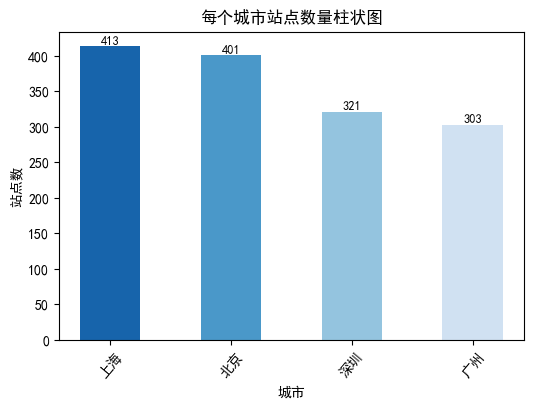

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体
plt.rcParams['font.family'] = ['SimHei']

# 从 Excel 文件中读取数据
df = pd.read_excel("汇总01.xlsx")

# 按站点数降序排列
df_sorted = df.sort_values(by="站点数", ascending=False)

# 使用 seaborn 的调色板生成蓝色渐变色，并反转颜色顺序，整体颜色更浅
palette = sns.color_palette("Blues", len(df_sorted))[::-1]  # 使用 "Blues" 调色板并反转

# 绘制柱状图
plt.figure(figsize=(6, 4))  # 设置大小
bars = plt.bar(df_sorted["城市"], df_sorted["站点数"], color=palette, width=0.5)  # 使用 seaborn 的渐变色

# 设置标签和标题
plt.xlabel('城市')
plt.ylabel('站点数')
plt.title('每个城市站点数量柱状图')

# 在每个柱体上添加具体的数字标签，更加美观
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + (bar.get_width()-0.15)/2, yval, round(yval), va='bottom', fontsize=9)

# x轴标签倾斜50度比较适合
plt.xticks(rotation=50)

plt.show()

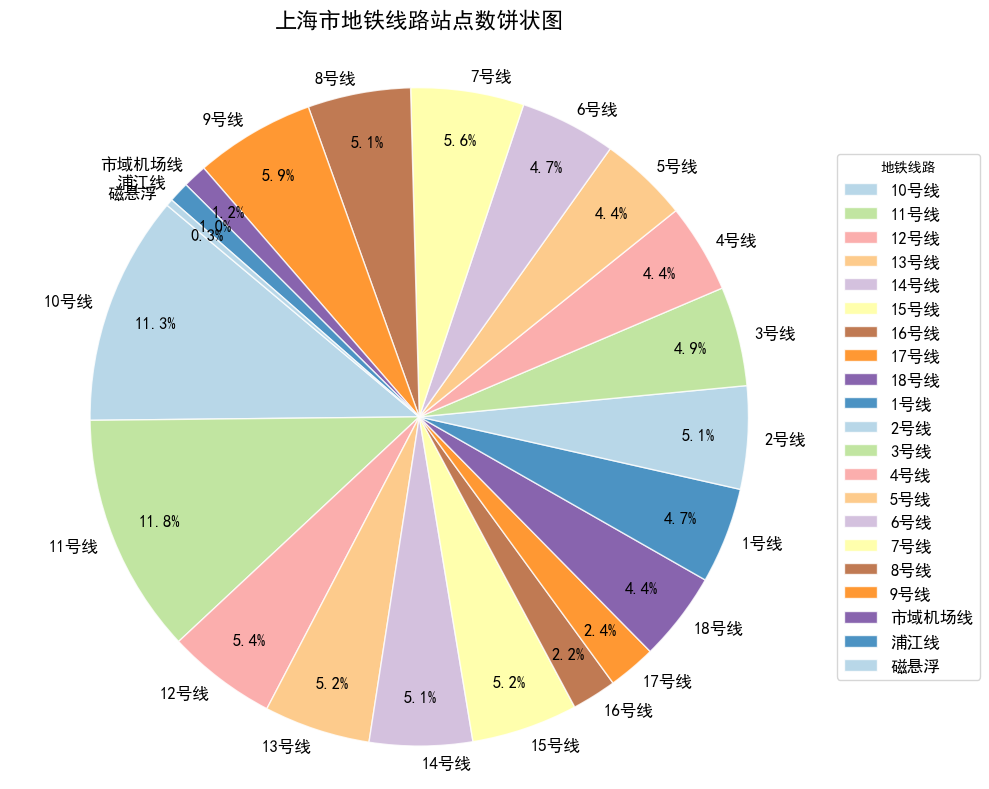

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.family'] = ['SimHei']

# 从 Excel 文件中读取数据
df = pd.read_excel("汇总.xlsx")

# 筛选出上海市的数据
shanghai_df = df[df['城市'] == '上海']

# 根据不同线路名称的格式来提取线路名称
def extract_line_name(line):
    if "号线" in line:
        return line.split("号线")[0] + "号线"
    elif "磁悬浮" in line:
        return "磁悬浮"
    elif "浦江线" in line:
        return "浦江线"
    elif "市域机场线" in line:
        return "市域机场线"
    else:
        return line

shanghai_df['地铁线路'] = shanghai_df['地铁线路'].apply(extract_line_name)

# 按线路分组并统计每条线路的站点数量
line_station_count = shanghai_df.groupby('地铁线路')['地铁站名'].count()

# 定义一组 Pastel 配色
pastel_colors = [
    '#A6CEE3', '#B2DF8A', '#FB9A99', '#FDBF6F', '#CAB2D6', 
    '#FFFF99', '#B15928', '#FF7F00', '#6A3D9A', '#1F78B4'
]

# 绘制饼状图
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    line_station_count, 
    labels=line_station_count.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=pastel_colors, 
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},  # 添加白色边框
    textprops={'fontsize': 12, 'color': 'black'},  # 调整标签字体大小和颜色
    pctdistance=0.85,  # 调整百分比标签位置
    labeldistance=1.05  # 调整类别标签位置
)

# 添加透明度，使饼图更柔和
for wedge in wedges:
    wedge.set_alpha(0.8)

plt.axis('equal')  # 使饼状图比例相等

# 添加标题
plt.title('上海市地铁线路站点数饼状图', fontsize=16, pad=20, fontweight='bold')

# 优化图例
plt.legend(
    wedges, 
    line_station_count.index, 
    title="地铁线路", 
    loc="center left", 
    bbox_to_anchor=(1, 0, 0.5, 1), 
    fontsize=12
)

# 调整布局，避免图例遮挡饼图
plt.tight_layout()

plt.show()

In [26]:
import pandas as pd
from pyecharts import options as opts
from pyecharts.charts import Geo
from pyecharts.globals import ChartType

# 从 Excel 文件中读取数据
subway_data = pd.read_excel("汇总01.xlsx")

# 提取城市名称和地铁线路数量
cities = subway_data["城市"].tolist()
line_counts = subway_data["地铁线路数量"].tolist()

# 计算最大值和最小值
max_count = max(line_counts)
min_count = min(line_counts)

# 绘制地图
geo = (
    Geo()
    # 选择中国地图
    .add_schema(maptype="china")
    .add(
        "",
        [list(z) for z in zip(cities, line_counts)],
        type_=ChartType.EFFECT_SCATTER,
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        # 对左下角的颜色条范围进行设置
        visualmap_opts=opts.VisualMapOpts(
            min_=float(min_count),  # 将最小值转换为浮点数
            max_=float(max_count),  # 将最大值转换为浮点数
            range_color=["#FFC0CB", "#FF6347", "#FF4500", "#8B0000"]  # 设置红色色系，从浅红到深红
        ),
        title_opts=opts.TitleOpts(title="各城市地铁线路数量分布"),
    )
)

# geo.render("subway_map.html")
make_snapshot(snapshot, geo.render(), "subway_map.png")

In [8]:
import pandas as pd
from pyecharts import options as opts
from pyecharts.charts import WordCloud
import matplotlib.pyplot as plt
 
 
# 读取Excel文件
df = pd.read_excel('汇总.xlsx')
 
# 筛选出北京、上海、广州、深圳的地铁站名
beijing_stations = df[df['城市'] == '北京']['地铁站名'].drop_duplicates().tolist()
shanghai_stations = df[df['城市'] == '上海']['地铁站名'].drop_duplicates().tolist()
guangzhou_stations = df[df['城市'] == '广州']['地铁站名'].drop_duplicates().tolist()
shenzhen_stations = df[df['城市'] == '深圳']['地铁站名'].drop_duplicates().tolist()

# 将四个城市的地铁站名合并到一个列表中
all_stations = shanghai_stations + beijing_stations + guangzhou_stations + shenzhen_stations
 
 
# 创建文本文件
with open('地铁站名.txt', 'w', encoding='utf-8') as file:
    for name in all_stations:
        file.write(name + '\n')

# 读取文本文件并创建词云图
with open("地铁站名.txt", "r", encoding="utf-8") as file:
    text = file.read()
 
# 绘制词云图
wordcloud = (
    WordCloud()
    .add("", [(word, text.count(word)) for word in set(text.split())], word_size_range=[20, 50])
    .set_global_opts(title_opts=opts.TitleOpts(title="地铁站名词云图"))
)
# 保存词云图
wordcloud.render("wordcloud.html")

'C:\\Users\\ThinkPad\\Desktop\\地铁\\wordcloud.html'